**Анализ успешности компьютерных игр**

Анализ выполняется для интернет-магазина «Стримчик», который продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Данные предоставлены до 2016 года. По условиям задания, сейчас декабрь 2016 г., планируется кампания на 2017-й.

**Описание данных**

`Name` — название игры   

`Platform` — платформа  

`Year_of_Release` — год выпуска  

`Genre` — жанр игры  

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  

`EU_sales` — продажи в Европе (миллионы проданных копий) 

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)  

`Critic_Score` — оценка критиков (максимум 100)  

`User_Score` — оценка пользователей (максимум 10)  

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

**Ход исследования:** 
1. Изучить данные и выявить аномалии и пропущенные значения.  
2. Провести предобработку данных: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.  
3. Провести анализ по данным и подготовить актуальные данные.  
4. Составить портреты пользователей для купных регионов.  
5. Выполнить проверку гипотез.  
6. Оформить проект и сделать выводы по каждому шагу.  

### Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
try:
    df = pd.read_csv('C:/Users/sdibi/Downloads/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
def dataframe_statistics(data):
    '''
    функция для вывода основных статистик по набору данных
    '''
    
    df_data = []
    df_cols = ['name', 'dtype', 'count', 'na_count', 'zero_count',
               'unique_count', 'neg_count', 'mean', 'std', 'min', '25%', '50%',
               '75%', 'max', 'out_left_count', 'out_right_count']
    
    # перебираем столбцы в наборе данных, считаем характеристики
    for column_name in data.columns:
        column_type = data[column_name].dtype
        column_count = data[column_name].count()
        column_na_count = data[column_name].isna().sum()
        column_zero_count = (data[column_name] == 0).sum()
        column_unique_count = data[column_name].nunique()
        
        # проверяем тип данных
        if 'int' in str(column_type) or 'float' in str(column_type):
            column_negative_count = (data[column_name] < 0).sum()
            column_mean = round(data[column_name].mean(), 2)
            column_std = round(data[column_name].std(), 2)
            column_min = round(data[column_name].min(), 2)
            column_25 = round(data[column_name].quantile(0.25), 2)
            column_50 = round(data[column_name].quantile(0.50), 2)
            column_75 = round(data[column_name].quantile(0.75), 2)
            column_max = round(data[column_name].max(), 2)
            # вычисляем выбросы
            outliers_left_count = data[data[column_name] < (column_mean - 3 * column_std)][column_name].count()
            outliers_right_count = data[data[column_name] > (column_mean + 3 * column_std)][column_name].count()
        else:
            column_negative_count = np.nan
            column_mean = np.nan
            column_std = np.nan
            column_min = np.nan
            column_25 = np.nan
            column_50 = np.nan
            column_75 = np.nan
            column_max = np.nan
            outliers_left_count = np.nan
            outliers_right_count = np.nan
 
        # собираем показатели по каждому полю
        df_data.append([column_name, column_type, column_count, column_na_count,
                        column_zero_count, column_unique_count,
                        column_negative_count, column_mean, column_std,
                        column_min, column_25, column_50, column_75, column_max,
                        outliers_left_count, outliers_right_count])
        
    # формируем набор данных
    df_res = pd.DataFrame(data = df_data, columns = df_cols)
    
    return df_res

In [6]:
#изучим основные статистики
dataframe_statistics(df)

,name,dtype,count,na_count,zero_count,unique_count,neg_count,mean,std,min,25%,50%,75%,max,out_left_count,out_right_count
0,Name,object,16713,2,0,11559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Platform,object,16715,0,0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year_of_Release,float64,16446,269,0,37,0.0,2006.48,5.88,1980.0,2003.0,2007.00,2010.00,2016.00,188.0,0.0
3,Genre,object,16713,2,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NA_sales,float64,16715,0,4508,402,0.0,0.26,0.81,0.0,0.0,0.08,0.24,41.36,0.0,182.0
5,EU_sales,float64,16715,0,5870,307,0.0,0.15,0.50,0.0,0.0,0.02,0.11,28.96,0.0,218.0
6,JP_sales,float64,16715,0,10514,244,0.0,0.08,0.31,0.0,0.0,0.00,0.04,10.22,0.0,236.0
7,Other_sales,float64,16715,0,6601,155,0.0,0.05,0.19,0.0,0.0,0.01,0.03,10.57,0.0,169.0
8,Critic_Score,float64,8137,8578,0,82,0.0,68.97,13.94,13.0,60.0,71.00,79.00,98.00,48.0,0.0
9,User_Score,object,10014,6701,0,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Вывод:**  
+ необходимо переименовать столбцы, переведя их в snake_case  
+ неправильный тип данных в `Year_of_Release`, `Critic_Score`, `User_Score`
+ пропуски в `Name`, `Year_of_Release`, `Critic_Score`, `User_Score`, `Rating`

### Предобработка данных

In [7]:
#проверим названия столбцов
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
#переименуем столбцы
df = df.rename(columns = {'Name': 'name',
                          'Platform' : 'platform',
                          'Year_of_Release' : 'year_of_release',
                          'Genre' : 'genre',
                          'NA_sales' : 'na_sales',
                          'EU_sales' : 'eu_sales',
                          'JP_sales' : 'jp_sales',
                          'Other_sales' : 'other_sales',
                          'Critic_Score' : 'critic_score',
                          'User_Score' : 'user_score',
                          'Rating' : 'rating'
                         })

In [9]:
#изучим строки, содержащие пропуски в `name`
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Слишком мало данных для того, чтобы можно было восстановить названия этих игр, поэтому удалим строки с отсутсвующими значениями.

In [10]:
#удаляем строки, содержащие пропуски в `name`
df = df.dropna(subset=['name'])

In [11]:
#изучим строки, содержащие пропуски в `year_of_release`
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Заполнять пропуски в годе выпуска медианой или средним значением нельзя, поскольку игры между собой никак не связаны. Таких строк не так много, поэтому лучше просто удалить строки с пропущенным значением.

In [12]:
#удаляем строки, содержащие пропуски в `year_of_release`
df = df.dropna(subset=['year_of_release'])
#изменим тип данных на целочисленный
df['year_of_release'] = df['year_of_release'].astype(int)

In [13]:
#изучим строки, содержащие пропуски в `critic_score`
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропущенные значения в `critic_score` невозможно заполнить медианой или средним значением, посколько оценка критиков складывается из большого количества факторов, которые мы не сможем учесть при попытке восстановить данные. В данном случае лучше оставить данные с пропусками. Так же поступим и с пропущенными значениями `user_score`.

In [14]:
#изменим тип данных в `critic_score` на вещественный
df['critic_score'] = df['critic_score'].astype(float)

In [15]:
#изучим уникальные значения в `user_score`
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо уже ожидаемого `nan` в данных присутствует аббревиатура `tbd`.  

>TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.  

То есть для этих игр еще не была сформированна пользовательская оценка. Будем считать это такими же пропущенными значениями и заменим `tbd` на `nan`.

In [16]:
#заменим `tbd` на `nan` и изменим тип данных на вещественный
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

In [17]:
#изучим уникальные значения в `rating`
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

>«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.


>«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"):

>«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.

>«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.


>«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

>«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.


>«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:

>ESRB 2013 Rating Pending.svg
«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант

"E" и "K-A" обозначают одно и то же, поэтому можем присвоить этим данным общий рейтинг "E". Пропущенные значения заменим на "RP". 

In [18]:
#заменим 'K-A' на 'E', 'AO' на 'M', а 'RP' на 'undefined'
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'] = df['rating'].replace('AO', 'M')
df['rating'] = df['rating'].replace('RP', 'undefined')
#заменим пропуски на `undefined`
df['rating'] = df['rating'].fillna('undefined')

In [19]:
# check
df['rating'].value_counts()

undefined    6677
E            3924
T            2905
M            1537
E10+         1393
EC              8
Name: rating, dtype: int64

In [20]:
#добавим столбец с суммарными продажами во всех регионах
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [21]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,undefined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,undefined,28.31


In [22]:
#приведем содержимое категориальных колонок к нижнему регистру
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()

In [23]:
#проверим данные на наличие дубликатов
df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [24]:
#избавимся от дубликатов
df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='last')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16711,lma manager 2007,x360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
16712,haitaka no psychedelica,psv,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16713,spirits & spells,gba,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined,0.01


**Вывод:**  
в ходе предобработки было обнаружено, что в исходных данных много пропусков в `Critic_Score`, `User_Score`, `Rating`. Информация, содержащаяся в них является важной для исследования и способной влиять на его результаты. Возможно, пропуски возникли по одной из причин: новизна игры, её непопулярность, или технический сбой. Необходимо сообщить об этом сотрудникам, осуществляющим сбор и выгрузку данных.

### Исследовательский анализ данных

####  Cколько игр выпускалось в разные годы

C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\2757822774.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Text(0, 0.5, 'Количество игр')

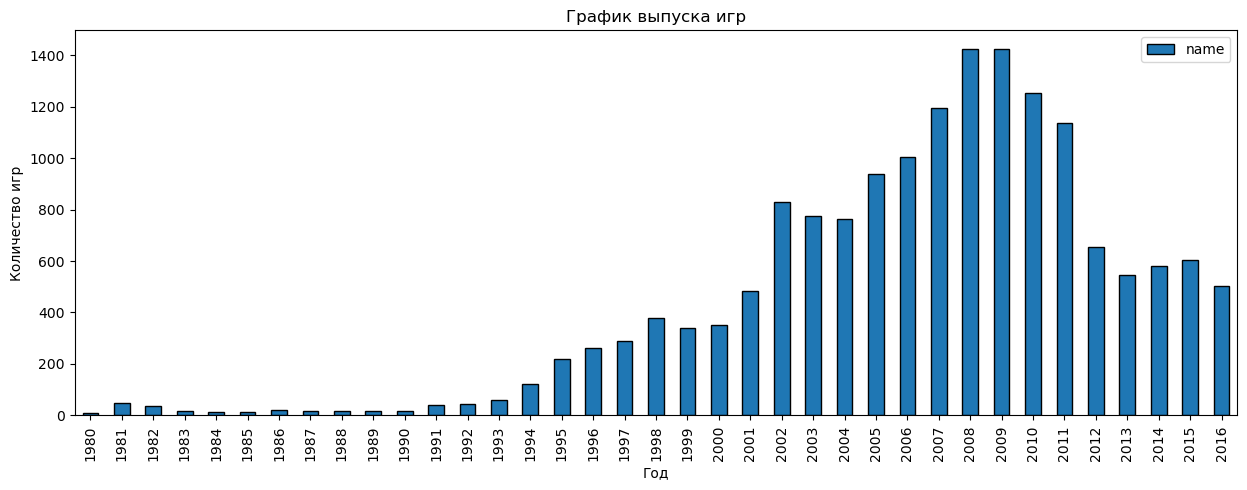

In [25]:
#визуализируем информацию о годе выхода
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', y='name', figsize=(15, 5), ec='black')
plt.style.use('seaborn-pastel')
plt.title('График выпуска игр')
plt.xlabel('Год')
plt.ylabel('Количество игр')

**Вывод:**  
+ с ***1980*** по ***1993*** игры выпускали в довольно медленном темпе  
+ начиная с ***1994*** отмечается тенденция к ***увеличению*** количества выпускаемых игр с резким скачком в ***2002***  
+ ***пик*** в ***2008 - 2009*** годах    
+ после ***2012*** года количество выпускаемых игр ***резко снизилось*** , сохраняясь примерно на одном уровне вплоть до ***2016*** года

#### Как менялись продажи по платформам

C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\1647635843.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Text(0, 0.5, 'Продажи')

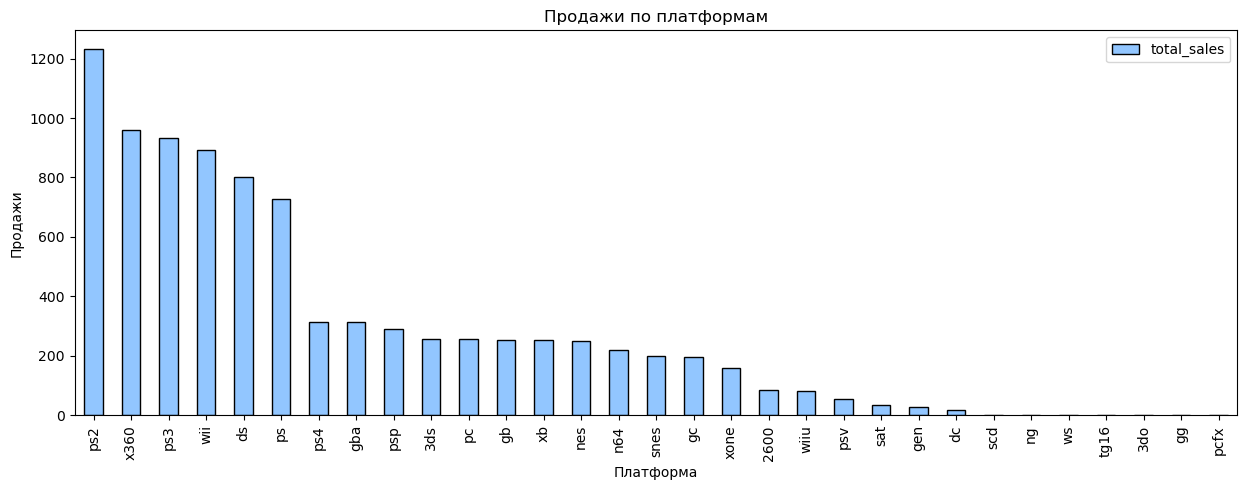

In [26]:
#визуализируем информацию о продажах по платформам
platform_sales = (df
                  .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                  .sort_values('total_sales', ascending=False)
                  )
platform_sales.plot(kind='bar',y='total_sales',figsize=(15, 5),ec='black')
plt.style.use('seaborn-pastel')
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

На графике хорошо заметны топ-6 платформ: ***PS2, X360, PS3, Wii, DS, PS.***

ps2


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\3099407934.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


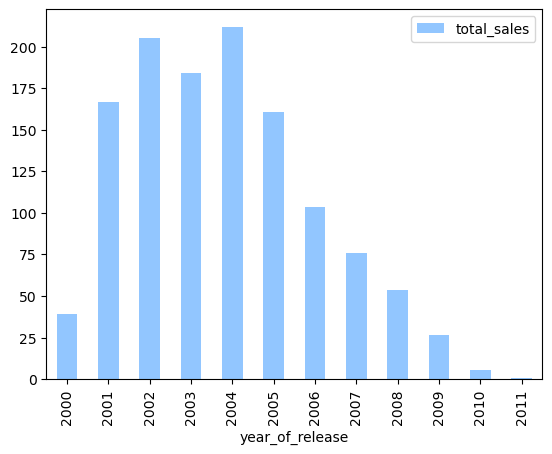

x360


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\3099407934.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


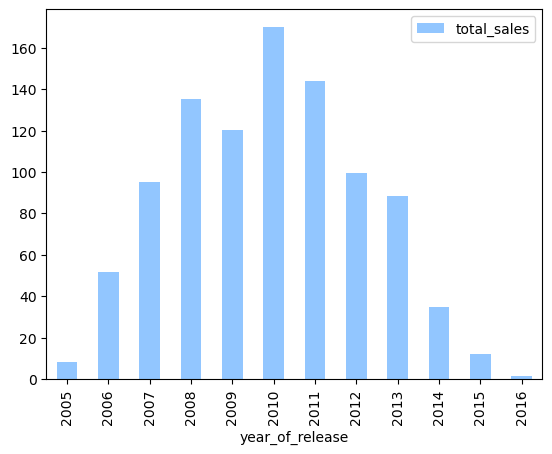

ps3


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\3099407934.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


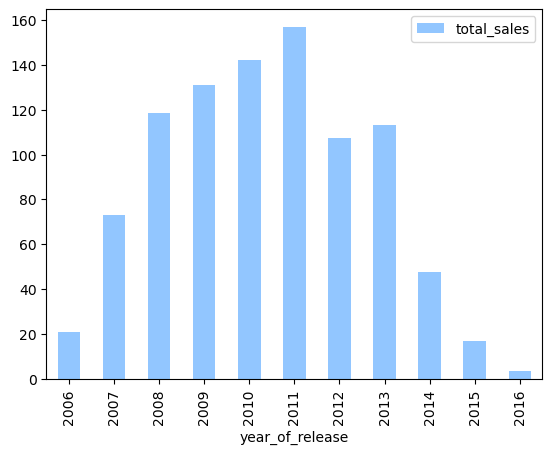

wii


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\3099407934.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


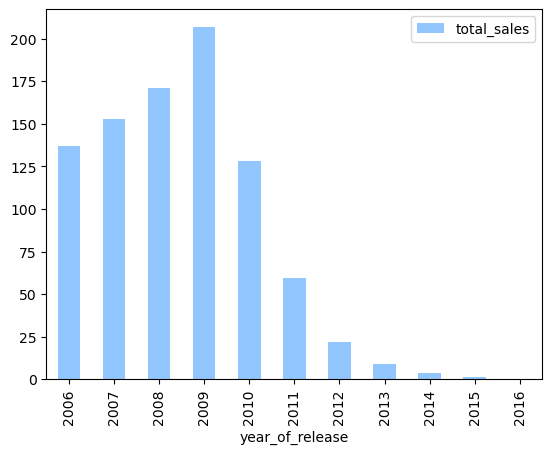

ds


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\3099407934.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


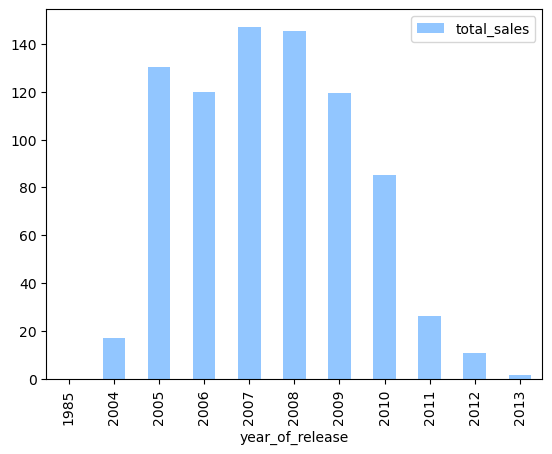

ps


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\3099407934.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


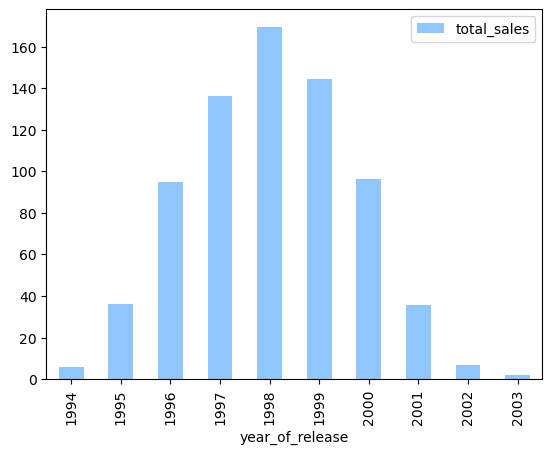

In [27]:
#цикл для построения графиков
for platform in platform_sales.index[:6]:
    print(platform)
    (df
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.style.use('seaborn-pastel')
    plt.show()

In [28]:
#проверим вызвавший сомнения выброс
df.query('platform == "ds" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,undefined,0.02


Консоль Nintendo DS была выпущена в 2004 году, так что лучше избавимся от этой строки

In [29]:
df.drop([15957],inplace=True)

**Вывод:** платформы быстро набирают популярность, сохраняя ее в течение 3-4 лет, после чего их продажи снижаются. Заметно, что из представленного топ-6 все платформы уже не являются актуальными, каждая из платформ "просуществовала" около ***10-и лет***.   
+ PS2 с 2000 по 2010 (10 лет), пик популярности 2002 - 2004 
+ X360 с 2006 по 2015 (9 лет), пик популярности 2010 - 2011   
+ PS3 2006 - 2016 (10 лет), пик популярности 2008 - 2011  
+ Wii 2006 - 2015 (9 лет), пик популярности 2006 - 2009  
+ DS с 2004 по 2013 (9 лет), пик популярности 2007 - 2008
+ PS с 1994 по 2003 (9 лет), пик популярности 1998 - 1999

#### Актуализация данных

Будем считать, что в актуальный период войдут данные за ***2013 - 2016 годы***:  
+ на графике продаж мы обратили внимание после 2012 года количества выпускаемых игр резко снизилось, сохраняясь примерно на одном уровне вплоть до 2016 года    
+ игровые платформы набирают популярность, сохраняя ее в течение 3-4 лет, а значит, в 2017 можно ожидать пик продаж платформ, появившихся в 2013-2014  

In [30]:
#создадим датасет с актуальными данными
actual_df = df.query('year_of_release >= 2013')

#### Какие платформы лидируют по продажам, растут или падают?

C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\2571337156.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Text(0, 0.5, 'Продажи')

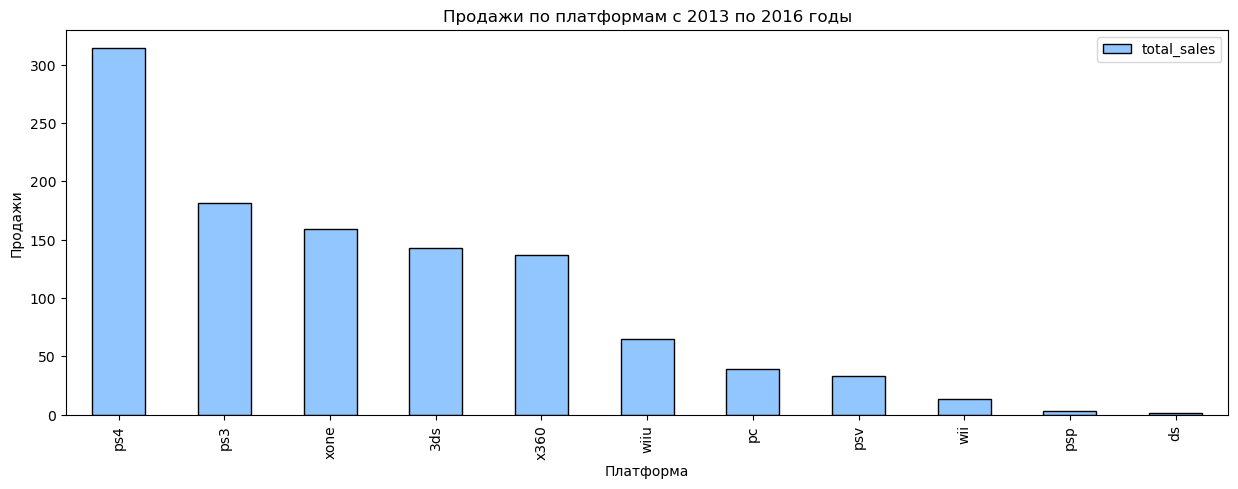

In [31]:
actual_platform_sales = (actual_df
                  .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                  .sort_values('total_sales', ascending=False)
                  )
actual_platform_sales.plot(kind='bar',y='total_sales',figsize=(15, 5),ec='black')
plt.style.use('seaborn-pastel')
plt.title('Продажи по платформам с 2013 по 2016 годы')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

**Вывод:** по итогам 2013 - 2016 годов к потенциально прибыльным платформам можно отнести ***PS4, PS3, XOne, X360 и 3DS.***

ps4


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\2341982709.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


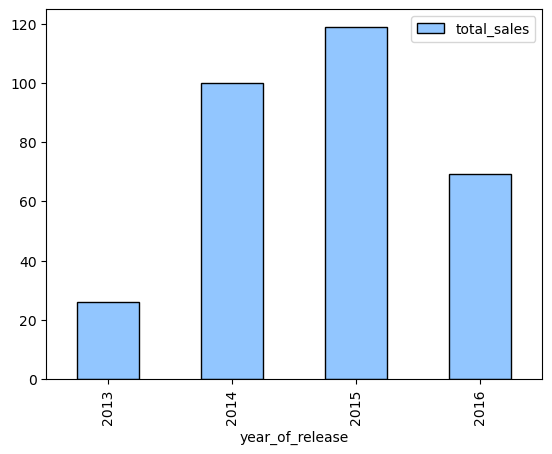

C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\2341982709.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


ps3


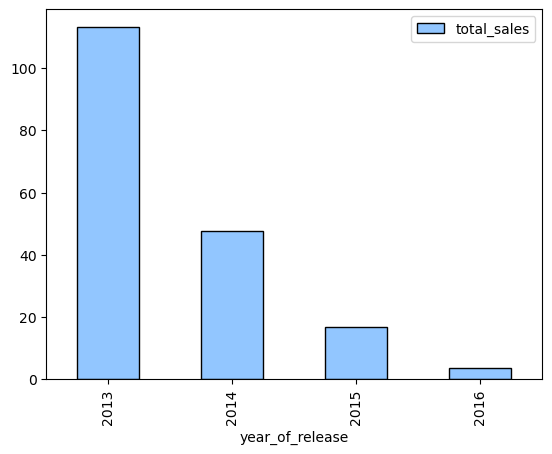

xone


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\2341982709.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


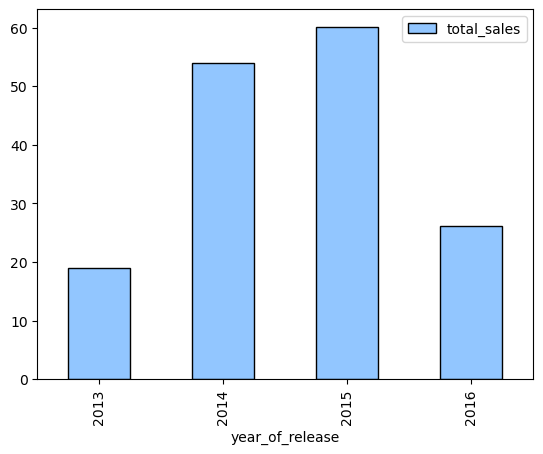

3ds


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\2341982709.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


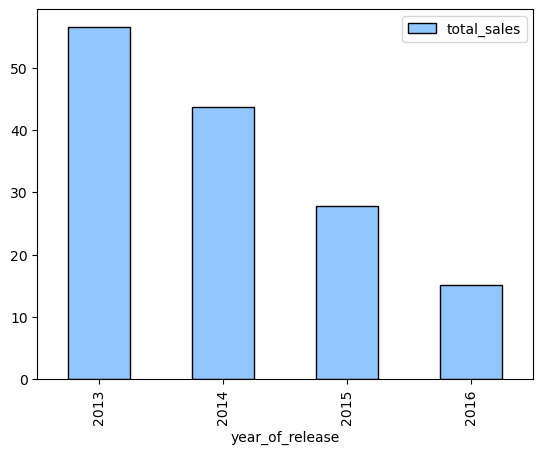

C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\2341982709.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


x360


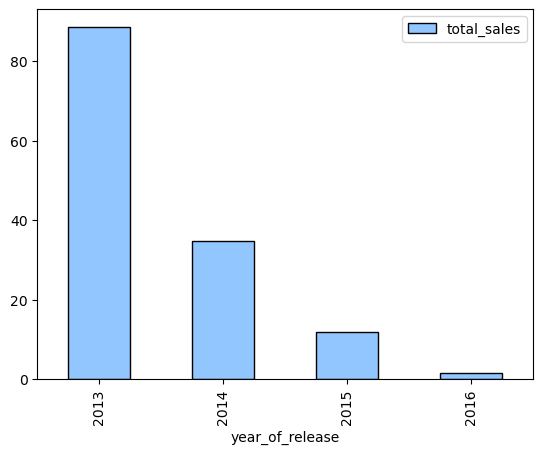

wiiu


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\2341982709.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


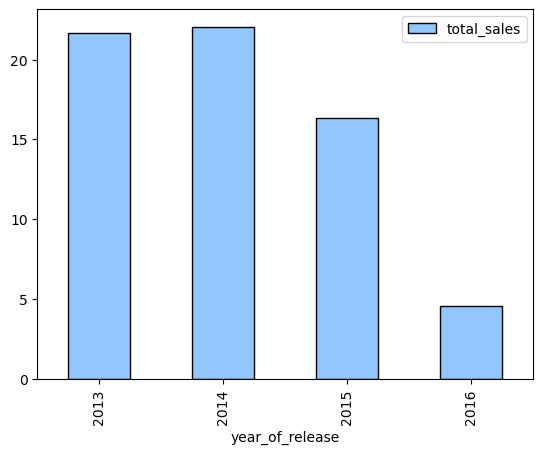

pc


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\2341982709.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


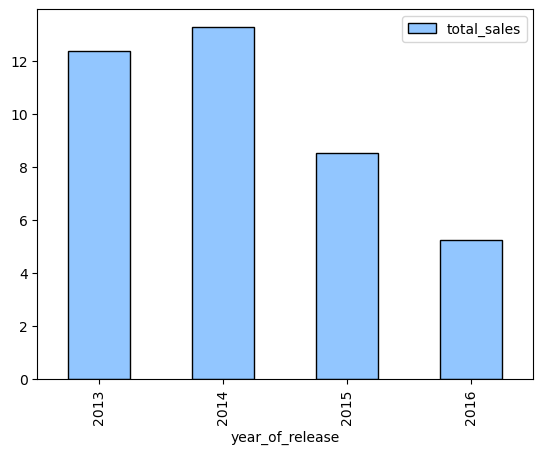

psv


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\2341982709.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


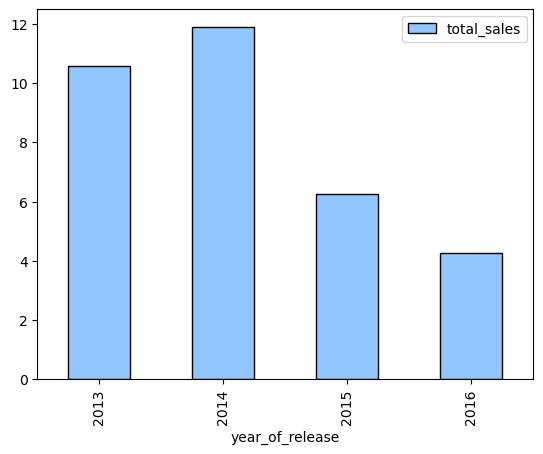

wii


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\2341982709.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


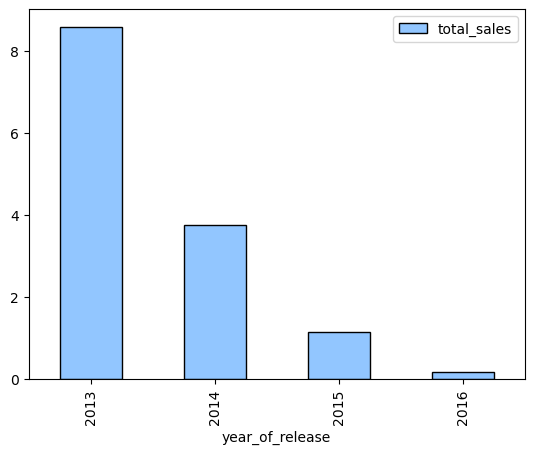

C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\2341982709.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


psp


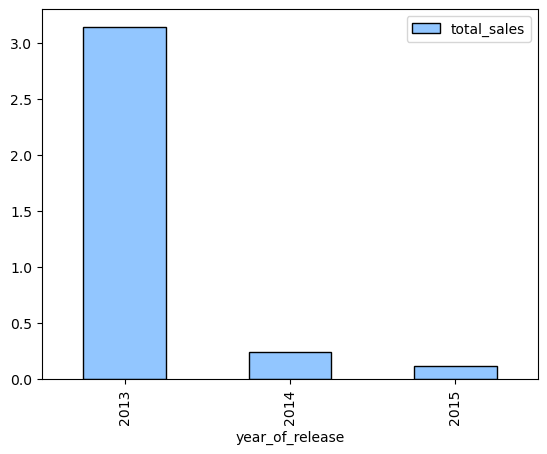

ds


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\2341982709.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


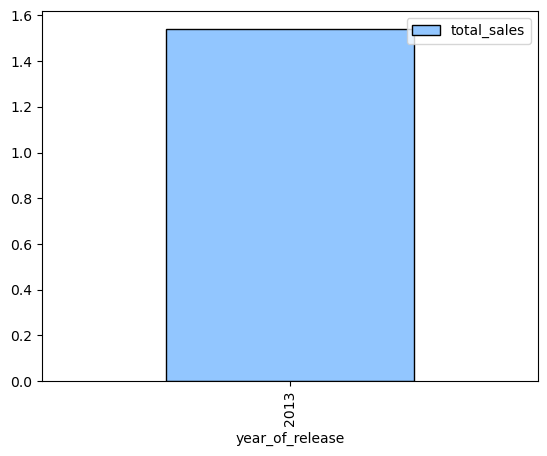

In [32]:
#цикл для построения графиков
for platform in actual_platform_sales.index:
    print(platform)
    (actual_df
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar', ec='black')
    )
    plt.style.use('seaborn-pastel')
    plt.show()

**Вывод:** на графиках заметно, что у части платформ к 2016 году наблюдается угасание популярности, но также есть и потенциально прибыльные.

**Падение популярности**:  
+ PS3   
+ X360  
+ Wii  
+ PSP  
+ DS  

**Потенциально прибыльные платформы:** 
+ PS4  
+ XOne  
+ PC  
+ 3DS  
+ WiiU   
+ PSV  

#### Глобальные продажи игр в разбивке по платформам

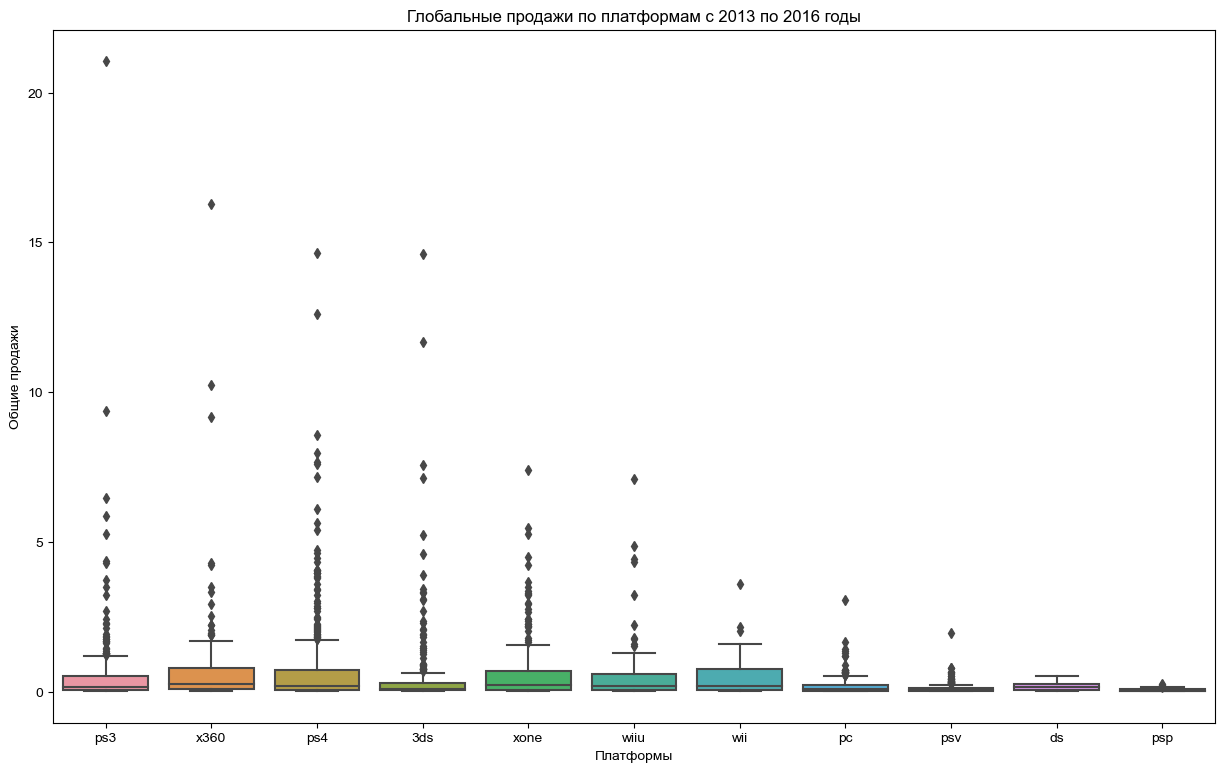

In [33]:
#построим график "ящик с усами"
plt.figure(figsize=(15, 9))
(sns.boxplot(data = actual_df, y = 'total_sales', x='platform')
    .set(title = 'Глобальные продажи по платформам с 2013 по 2016 годы', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
         ))
sns.set_style('whitegrid')
plt.show()

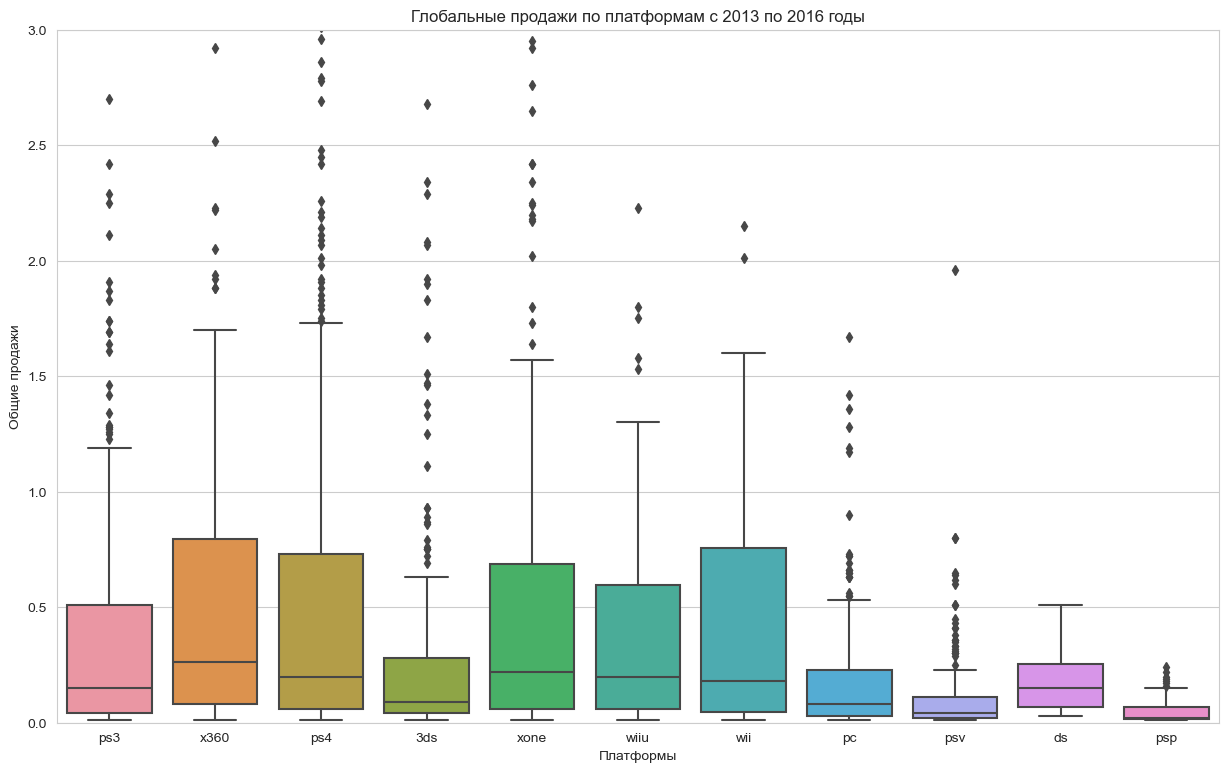

In [34]:
#еще раз построим график "ящик с усами", на этот раз изменим масштаб
plt.figure(figsize=(15, 9))
(sns.boxplot(data = actual_df, y = 'total_sales', x='platform')
    .set(title = 'Глобальные продажи по платформам с 2013 по 2016 годы', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
         ylim=(0, 3)))
sns.set_style('whitegrid')
plt.show()

**Вывод:** на графике видно, что ***медианные значения продаж у всех платформ находятся примерно на одном уровне*** (около 0,2 миллионов). Это указывает на то, что большинство игр имеют относительно небольшие продажи. Однако заметно и наличие ***бестселлеров*** на каждой платформе, их продажи значительно превышают обычные значения. 

#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Посмотрим, как влияют отзывы пользователей и критиков на продажи платформы XOne.

XOne


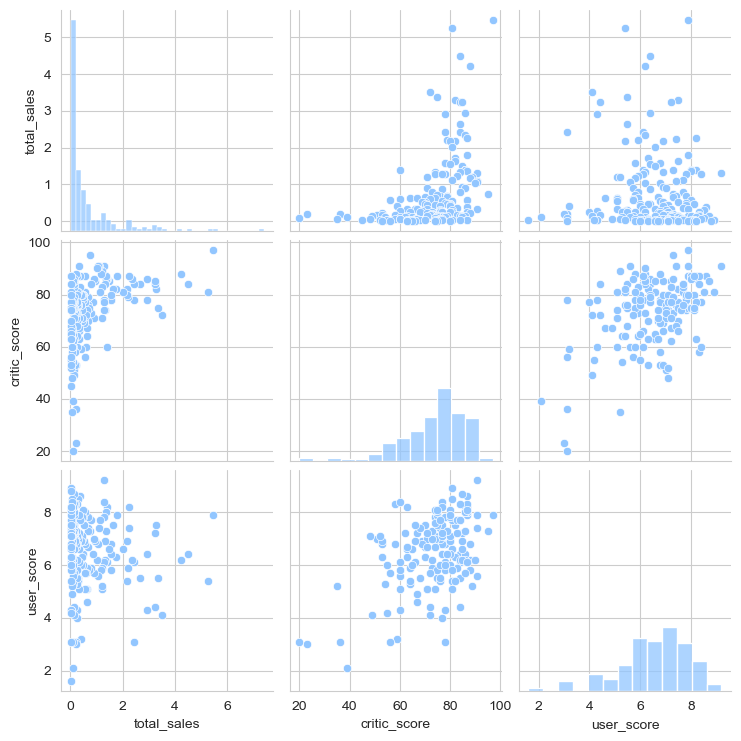

Матрица корреляций:


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


In [35]:
print('XOne')
sns.pairplot(actual_df[actual_df.platform == "xone"][['total_sales', 'critic_score', 'user_score']])
plt.show()
print('Матрица корреляций:')
actual_df[actual_df.platform == "xone"][['total_sales', 'critic_score', 'user_score']].corr()

**Вывод:** ***корреляция между пользовательсикими оценками и продажами отсутствует***. Зато отзывы критиков на продажи влияют: корреляция положительная, а значит ***чем выше оценки критиков, тем выше продажи***. Помимо этого заметна еще и положительная корреляция между оценками пользователей и критиков.  

#### Как влияют отзывы пользователей и критиков на продажи внутри других популярных платформ

PS4


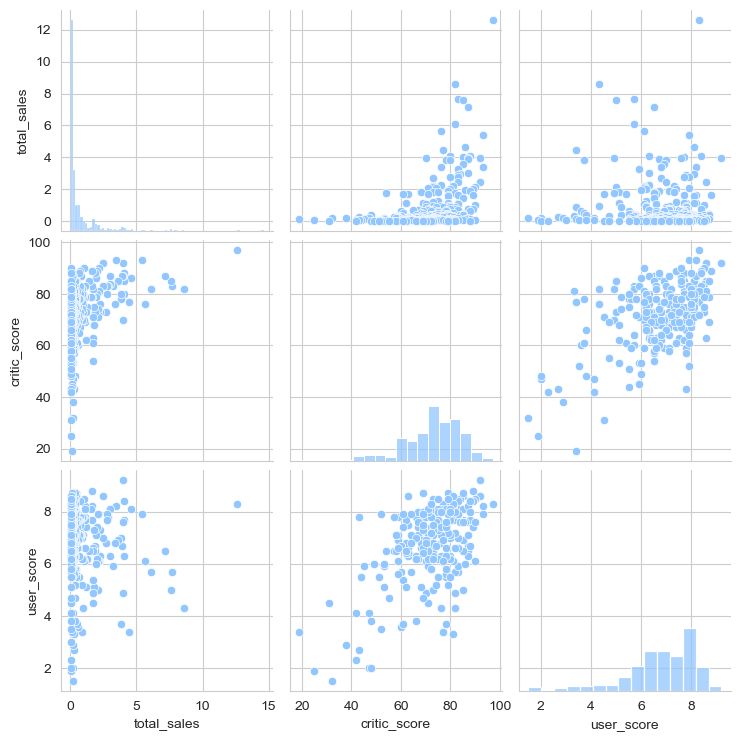

Матрица корреляций:


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


In [36]:
print('PS4')
sns.pairplot(actual_df[actual_df.platform == "ps4"][['total_sales', 'critic_score', 'user_score']])
plt.show()
print('Матрица корреляций:')
actual_df[actual_df.platform == "ps4"][['total_sales', 'critic_score', 'user_score']].corr()

PC


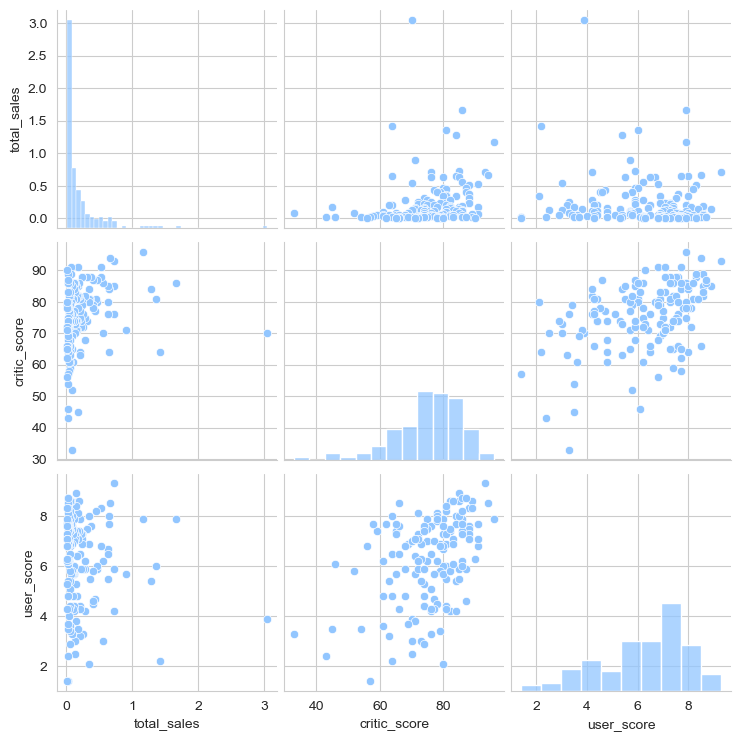

Матрица корреляций:


,total_sales,critic_score,user_score
total_sales,1.000000,0.196030,-0.093842
critic_score,0.196030,1.000000,0.429562
user_score,-0.093842,0.429562,1.000000


In [37]:
print('PC')
sns.pairplot(actual_df[actual_df.platform == "pc"][['total_sales', 'critic_score', 'user_score']])
plt.show()
print('Матрица корреляций:')
actual_df[actual_df.platform == "pc"][['total_sales', 'critic_score', 'user_score']].corr()

**Вывод:** у платформ PS4 и PC так же заметна ***положительная корреляция между объёмами продаж и оценками критиков***, а корреляция с пользовательскими оценками отсутсвует. 

#### Oбщее распределение игр по жанрам

C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\257244112.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Text(0, 0.5, 'Продажи')

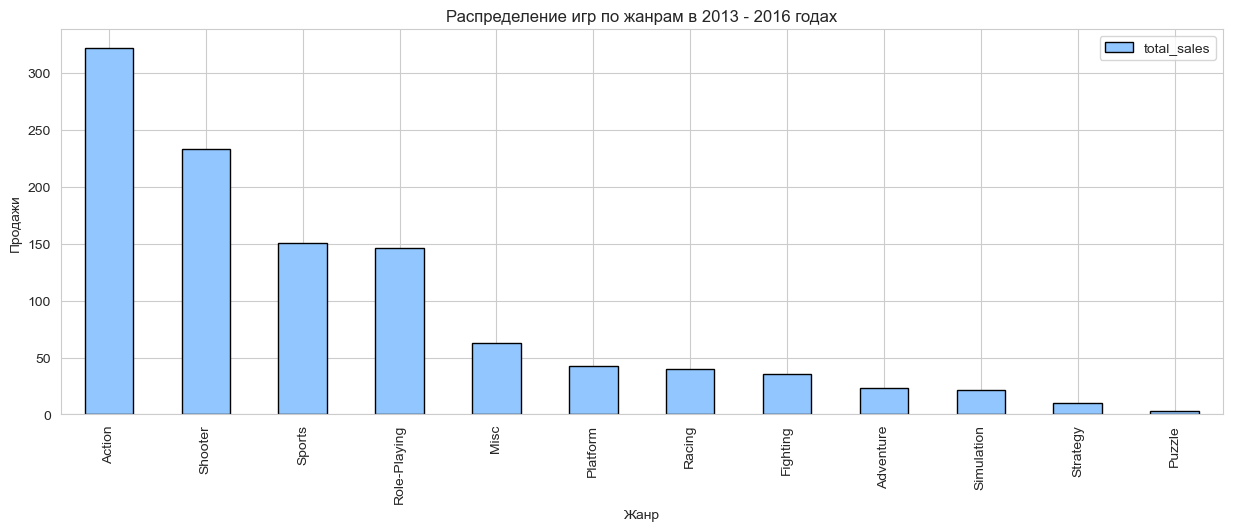

In [38]:
(actual_df
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar',y='total_sales',figsize=(15, 5),ec='black'))
plt.style.use('seaborn-pastel')
plt.title('Распределение игр по жанрам в 2013 - 2016 годах')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

In [39]:
#сгруппируем игры по жанрам и для каждого жанра посчитаем медиану продаж
genre_median = (actual_df.groupby('genre')
 .agg(total_sales_median=('total_sales', 'median'))
 .sort_values(by='total_sales_median', ascending=False)
 .reset_index()
               )
genre_median

,genre,total_sales_median
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


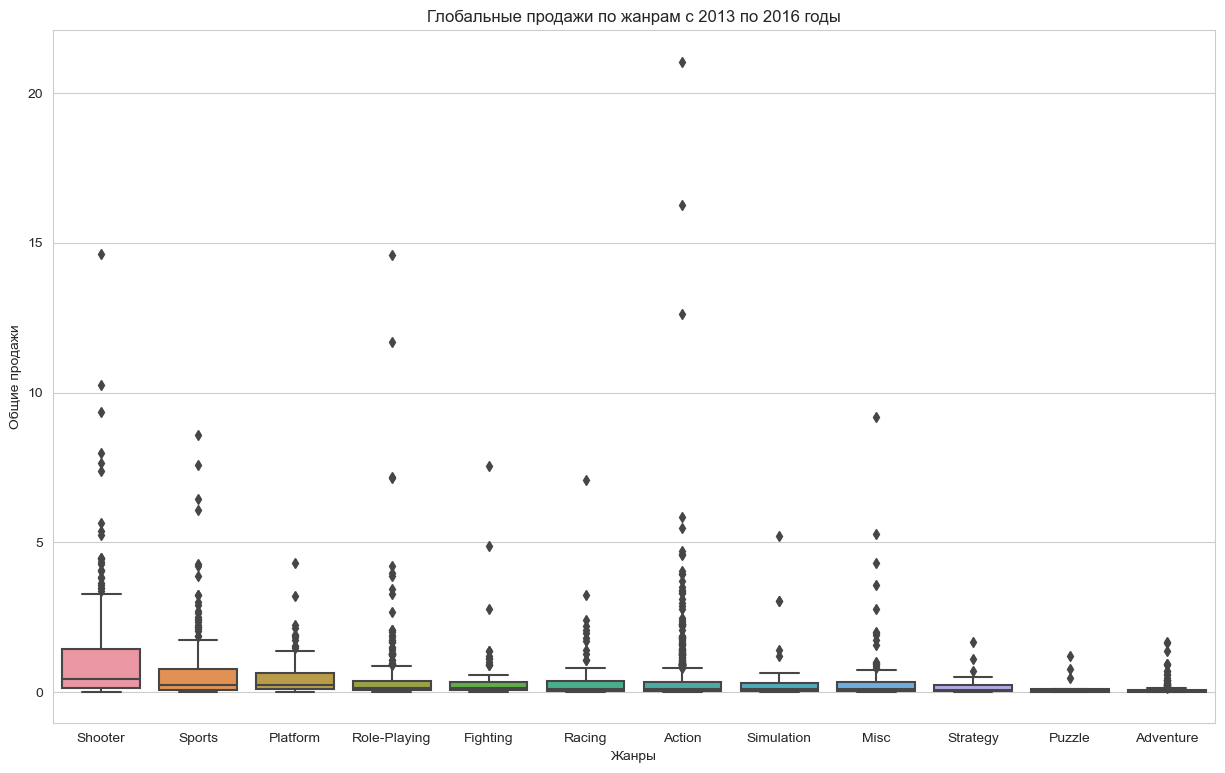

In [40]:
#построим график "ящик с усами"
plt.figure(figsize=(15, 9))
(sns.boxplot(data = actual_df, y = 'total_sales', x='genre',  order=genre_median['genre'])
    .set(title = 'Глобальные продажи по жанрам с 2013 по 2016 годы', 
         xlabel = 'Жанры', 
         ylabel = 'Общие продажи',
        ))
sns.set_style('whitegrid')
plt.show()

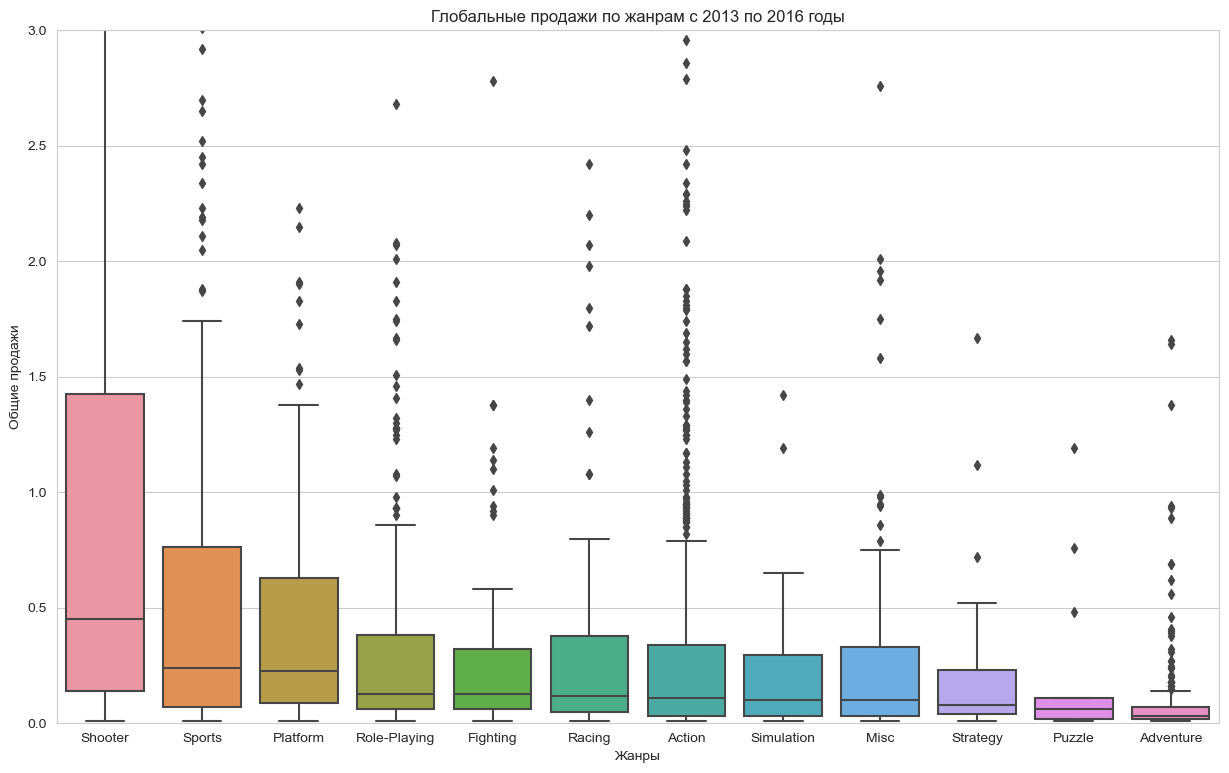

In [41]:
#ещё раз построим график "ящик с усами", на этот раз изменим масштаб для лучшей визуализации медиан
plt.figure(figsize=(15, 9))
(sns.boxplot(data = actual_df, y = 'total_sales', x='genre', order=genre_median['genre'])
    .set(title = 'Глобальные продажи по жанрам с 2013 по 2016 годы', 
         xlabel = 'Жанры', 
         ylabel = 'Общие продажи',
         ylim=(0, 3)))
sns.set_style('whitegrid')
plt.show()

**Вывод:** на графике хорошо выделяются жанры с высокими и низкими продажами. Отдельно можно выделить наиболее стабильные жанры -  Shooter, Sports, Platform. А у жанра Action хоть и малая медиана относительно вышеперечисленных, зато есть явные бестселлеры.

***Прибыльные жанры:***  
+ Action  
+ Shooter  
+ Sports  
+ Platform
+ Role-Playing  

***Неприбыльные жанры:***  
+ Adventure  
+ Simulation  
+ Strategy  
+ Puzzle  


***
**Итоги исследовательского анализа данных:** 
+ начиная с ***1994*** отмечается тенденция к ***увеличению*** количества выпускаемых игр с резким скачком в ***2002***. ***Пик*** приходится на ***2008 - 2009*** годы.  
+ характерный срок жизни платформы около **10-и лет**, исходя из этого решили считать актуальными данные за 2013 - 2016 годы  
+ потенциально прибыльные платформы: ***PS4, XOne, PC*** 
+ медианные значения продаж у всех платформ находятся примерно на одном уровне (около 0,2 миллионов). Это указывает на то, что большинство игр имеют относительно небольшие продажи. Однако заметно и наличие бестселлеров на каждой платформе, их продажи значительно превышают обычные значения  
+ отзывы критиков влияют на продажи: ***чем выше оценки критиков, тем выше продажи***  
+ ***Прибыльные жанры:*** Action, Shooter, Sports, Role-Playing, Platform  

### Портрет пользователя каждого региона

In [42]:
#Функция для визуализации
def portret_regions_plot(category, region, ax):
    pivot = (actual_df
             .pivot_table(index = category, values = region, aggfunc = 'sum')
             .sort_values(by=region, ascending=False)[:5])
    title_dict = {'na_sales': 'Продажи в Северной Америке',
                  'eu_sales': 'Продажи в Европе',
                  'jp_sales': 'Продажи в Японии',
                  'other_sales': 'Продажи в других регионах'}
    plot = pivot.plot(kind='bar', title=title_dict[region], ax=axes[ax], fontsize=18, rot=35, ec='black')
    plt.style.use('seaborn-pastel')
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

Топ-5 платформ


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\1288749792.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')
C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\1288749792.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')
C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\1288749792.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they wi

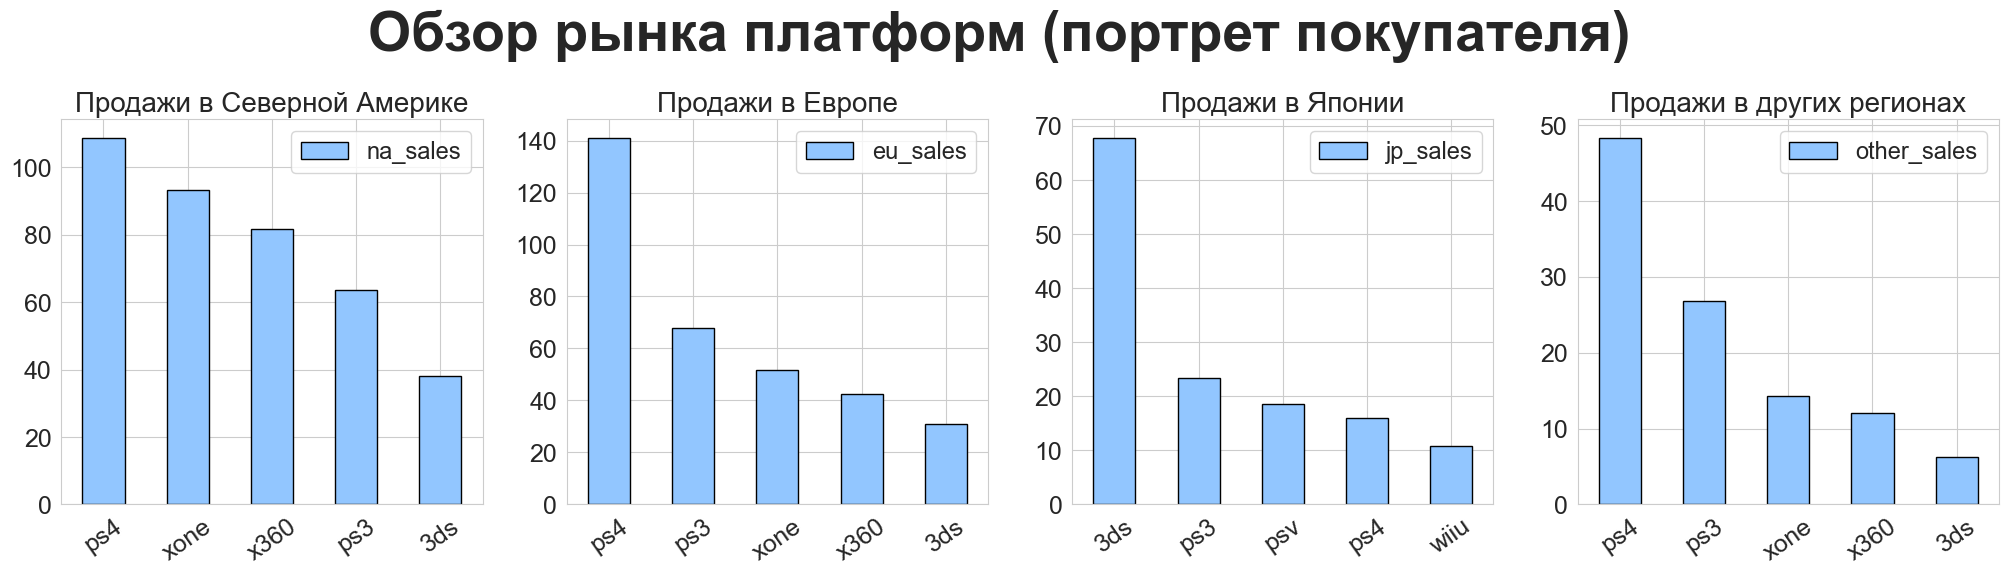

In [43]:
print ('Топ-5 платформ')
fig, axes = plt.subplots(1, 4, figsize=(25,5))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', y=1.1, fontweight='bold', fontsize=40)

portret_regions_plot('platform', 'na_sales', 0)
portret_regions_plot('platform', 'eu_sales', 1)
portret_regions_plot('platform', 'jp_sales', 2)
portret_regions_plot('platform', 'other_sales', 3)

**Вывод:** и в ***Северной Америке и в Европе*** по популярности лидирует ***PS4***, такая же ситуация и в ***других регионах***, а вот в ***Японии*** другой фаворит - ***3DS***. 

Топ-5 жанров


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\1288749792.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')
C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\1288749792.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')
C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\1288749792.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they wi

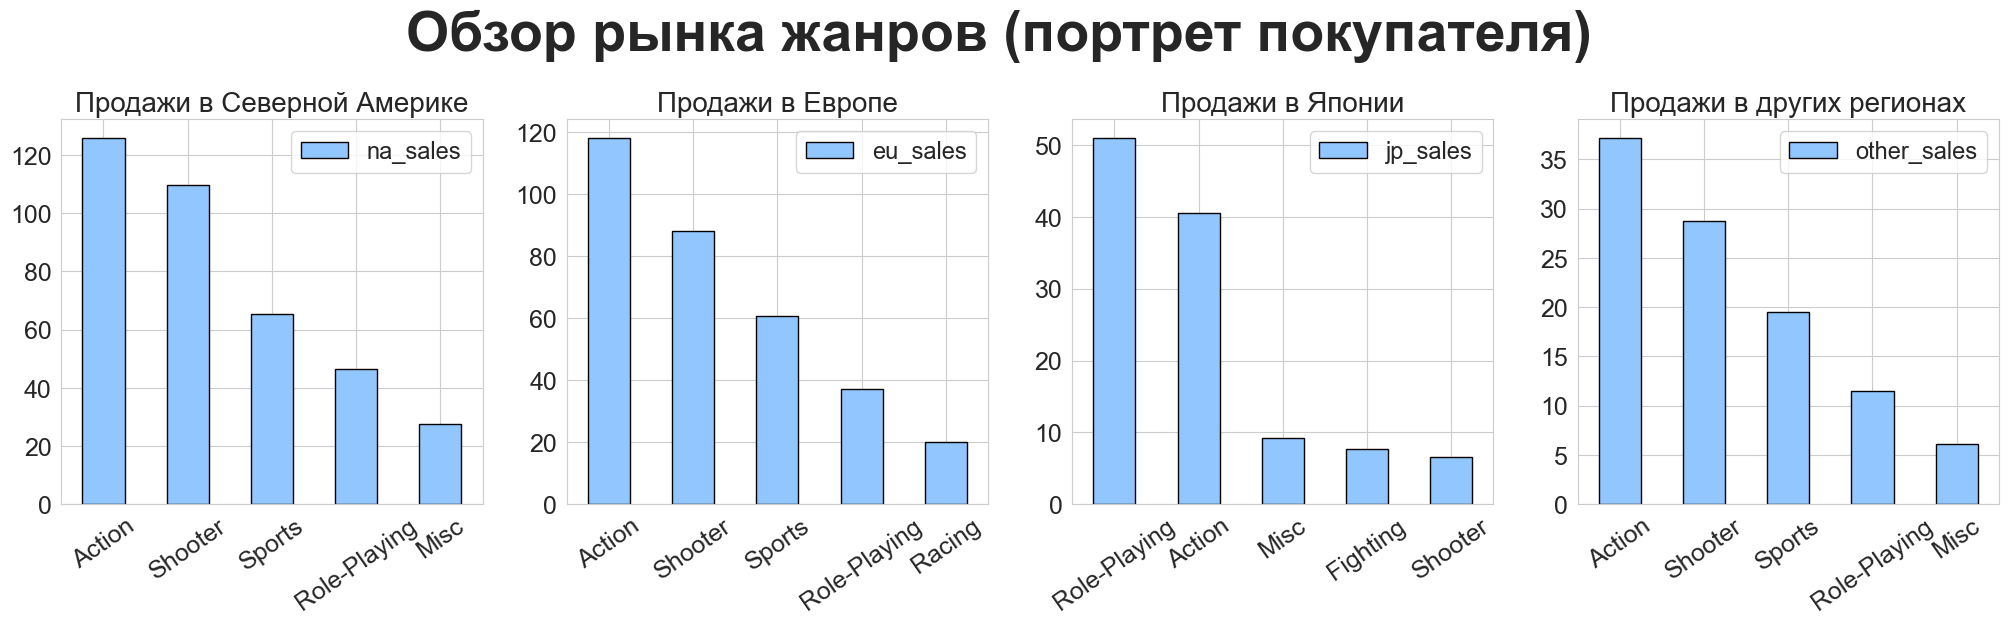

In [44]:
print ('Топ-5 жанров')
fig, axes = plt.subplots(1, 4, figsize=(25,5))
fig.suptitle('Обзор рынка жанров (портрет покупателя)', y=1.1, fontweight='bold', fontsize=40)

portret_regions_plot('genre', 'na_sales', 0)
portret_regions_plot('genre', 'eu_sales', 1)
portret_regions_plot('genre', 'jp_sales', 2)
portret_regions_plot('genre', 'other_sales', 3)

**Вывод:** у пользователей из ***Северной Америки, Европы и других регионов*** вкусы схожи, все они отдают предпочтение жанрам ***Action, Shooter, Sports и Role-Playing*** (в порядке убывания). В ***Японии*** же с большим отрывом лидирует жанр ***Role-Playing***.

In [45]:
df_app = pd.DataFrame([['ps',1,2,3],
                   ['xone',3,5,6],
                   ['pc',8,9,10],
                   ['ps3',1,7,3],
                   ['ps4',5,2,3]], columns=['platform', 'eu','jp','na'])
display(df_app)

df_other = df_app[3:]
df_other = df_other.append({'platform': 'Other', 'eu': df_app['eu'].sum()-df_app['eu'][3:].sum(),
                  'jp': df_app['jp'].sum()-df_app['jp'][3:].sum(),
                  'na': df_app['na'].sum()-df_app['na'][3:].sum()}, ignore_index = True)
df_other

,platform,eu,jp,na
0,ps,1,2,3
1,xone,3,5,6
2,pc,8,9,10
3,ps3,1,7,3
4,ps4,5,2,3


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\1893446840.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_other = df_other.append({'platform': 'Other', 'eu': df_app['eu'].sum()-df_app['eu'][3:].sum(),


,platform,eu,jp,na
0,ps3,1,7,3
1,ps4,5,2,3
2,Other,12,16,19


### check

In [46]:
# check

actual_df.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)

,na_sales
platform,
ps4,108.74
xone,93.12
x360,81.66
ps3,63.50
3ds,38.20
wiiu,29.21
pc,11.11
wii,6.56
psv,5.04


In [47]:
na_platform_pivot_table = actual_df.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)
eu_platform_pivot_table = actual_df.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)
jp_platform_pivot_table = actual_df.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)

C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\369017013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_na_platforms.loc['Другие'] = other_platform_na_sales
C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\369017013.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_eu_platforms.loc['Другие'] = other_platform_eu_sales
C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\369017013.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

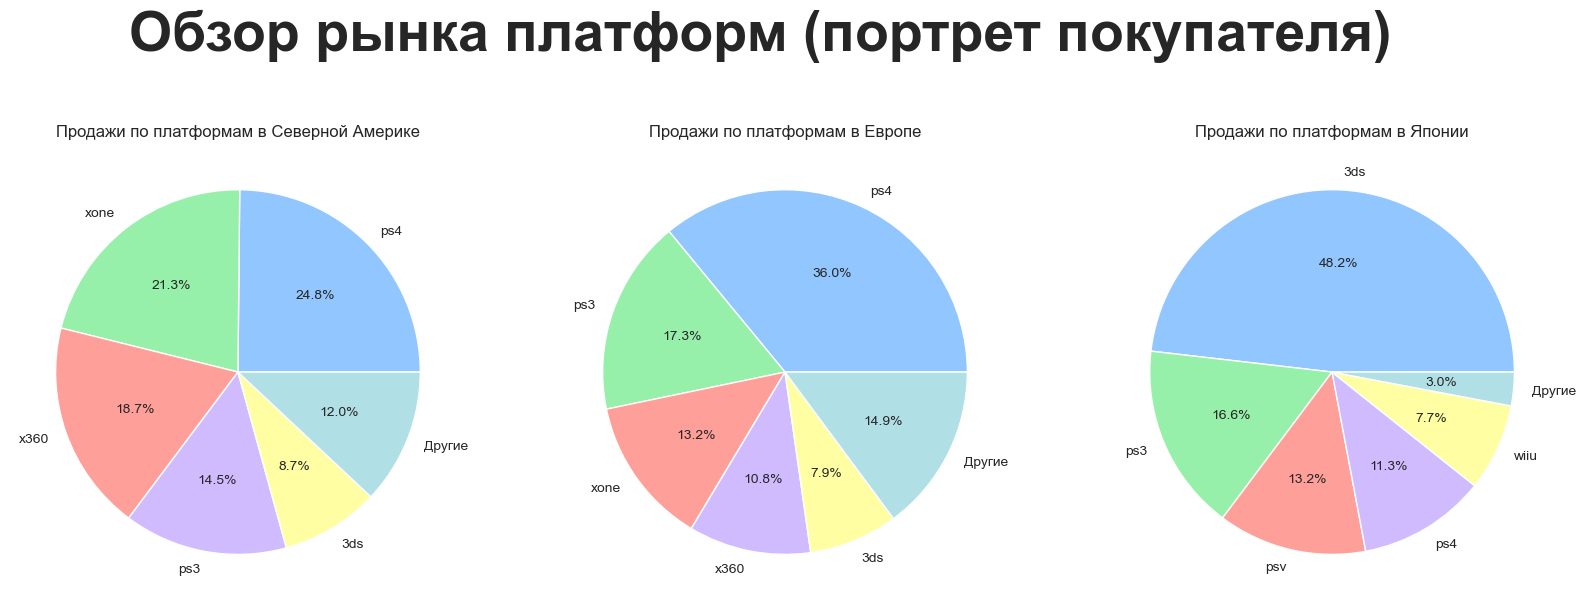

In [48]:
#изучим рынок платформ
top5_na_platforms = na_platform_pivot_table.head(5)
top5_eu_platforms = eu_platform_pivot_table.head(5)
top5_jp_platforms = jp_platform_pivot_table.head(5)

other_platform_na_sales = na_platform_pivot_table[~na_platform_pivot_table.index.isin(top5_na_platforms.index)].sum()
other_platform_eu_sales = eu_platform_pivot_table[~eu_platform_pivot_table.index.isin(top5_eu_platforms.index)].sum()
other_platform_jp_sales = jp_platform_pivot_table[~jp_platform_pivot_table.index.isin(top5_jp_platforms.index)].sum()

top5_na_platforms.loc['Другие'] = other_platform_na_sales
top5_eu_platforms.loc['Другие'] = other_platform_eu_sales
top5_jp_platforms.loc['Другие'] = other_platform_jp_sales

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', y=1.1, fontweight='bold', fontsize=40)

axes[0].pie(top5_na_platforms['na_sales'], labels=top5_na_platforms.index, autopct='%1.1f%%')
axes[0].set_title('Продажи по платформам в Северной Америке')

axes[1].pie(top5_eu_platforms['eu_sales'], labels=top5_eu_platforms.index, autopct='%1.1f%%')
axes[1].set_title('Продажи по платформам в Европе')

axes[2].pie(top5_jp_platforms['jp_sales'], labels=top5_jp_platforms.index, autopct='%1.1f%%')
axes[2].set_title('Продажи по платформам в Японии')

plt.show()

In [49]:
top5_na_platforms

,na_sales
platform,
ps4,108.74
xone,93.12
x360,81.66
ps3,63.50
3ds,38.20
Другие,52.49


In [50]:
top5_eu_platforms

,eu_sales
platform,
ps4,141.09
ps3,67.81
xone,51.59
x360,42.52
3ds,30.96
Другие,58.26


In [51]:
top5_jp_platforms

,jp_sales
platform,
3ds,67.81
ps3,23.35
psv,18.59
ps4,15.96
wiiu,10.88
Другие,4.19


In [52]:
na_genre_pivot_table = actual_df.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)
eu_genre_pivot_table = actual_df.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)
jp_genre_pivot_table = actual_df.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)

C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\4244802660.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_na_genre.loc['Другие'] = other_genre_na_sales
C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\4244802660.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_eu_genre.loc['Другие'] = other_genre_eu_sales
C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\4244802660.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

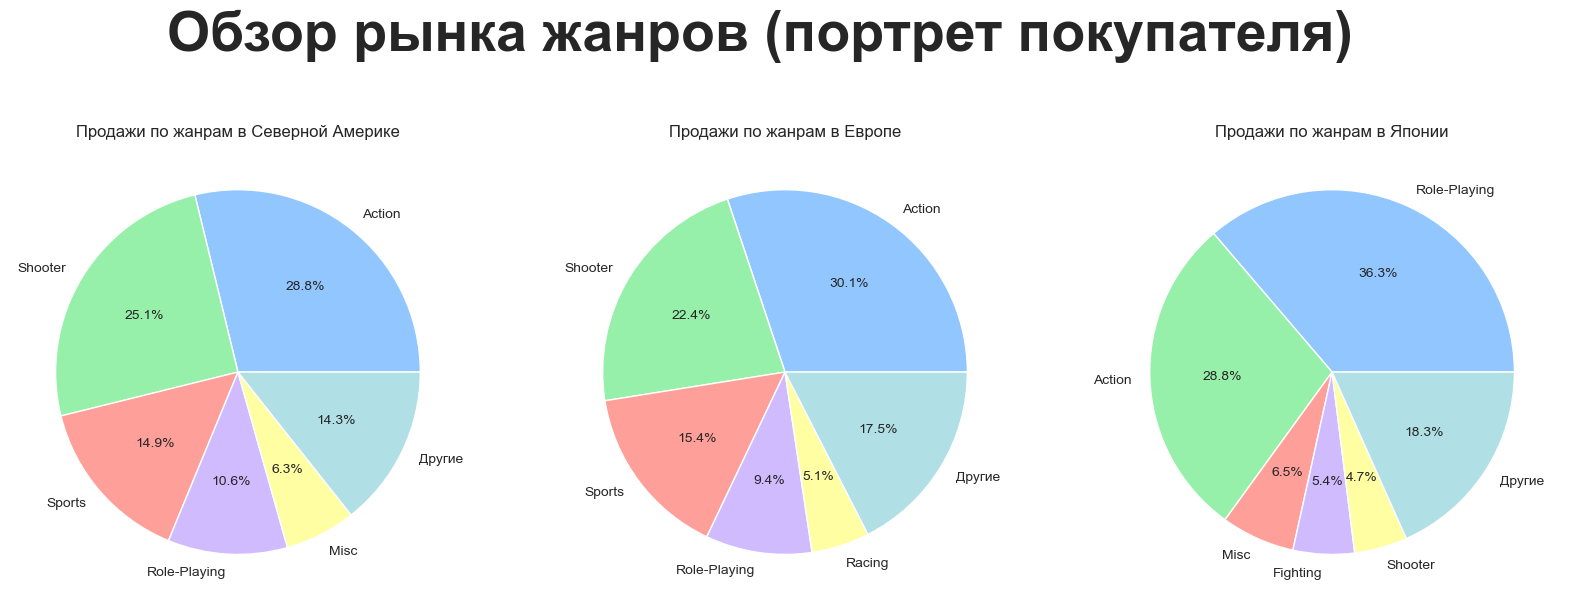

In [53]:
#изучим рынок жанров
top5_na_genre = na_genre_pivot_table.head(5)
top5_eu_genre = eu_genre_pivot_table.head(5)
top5_jp_genre = jp_genre_pivot_table.head(5)

other_genre_na_sales = na_genre_pivot_table[~na_genre_pivot_table.index.isin(top5_na_genre.index)].sum()
other_genre_eu_sales = eu_genre_pivot_table[~eu_genre_pivot_table.index.isin(top5_eu_genre.index)].sum()
other_genre_jp_sales = jp_genre_pivot_table[~jp_genre_pivot_table.index.isin(top5_jp_genre.index)].sum()

top5_na_genre.loc['Другие'] = other_genre_na_sales
top5_eu_genre.loc['Другие'] = other_genre_eu_sales
top5_jp_genre.loc['Другие'] = other_genre_jp_sales

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Обзор рынка жанров (портрет покупателя)', y=1.1, fontweight='bold', fontsize=40)

axes[0].pie(top5_na_genre['na_sales'], labels=top5_na_genre.index, autopct='%1.1f%%')
axes[0].set_title('Продажи по жанрам в Северной Америке')

axes[1].pie(top5_eu_genre['eu_sales'], labels=top5_eu_genre.index, autopct='%1.1f%%')
axes[1].set_title('Продажи по жанрам в Европе')

axes[2].pie(top5_jp_genre['jp_sales'], labels=top5_jp_genre.index, autopct='%1.1f%%')
axes[2].set_title('Продажи по жанрам в Японии')

plt.show()

In [54]:
top5_na_genre

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Другие,62.76


In [55]:
top5_eu_genre

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Другие,68.56


In [56]:
top5_jp_genre

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Другие,25.79


Влияет ли рейтинг ESRB на продажи в отдельном регионе?


C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\1288749792.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')
C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\1288749792.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')
C:\Users\sdibi\AppData\Local\Temp\ipykernel_30284\1288749792.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they wi

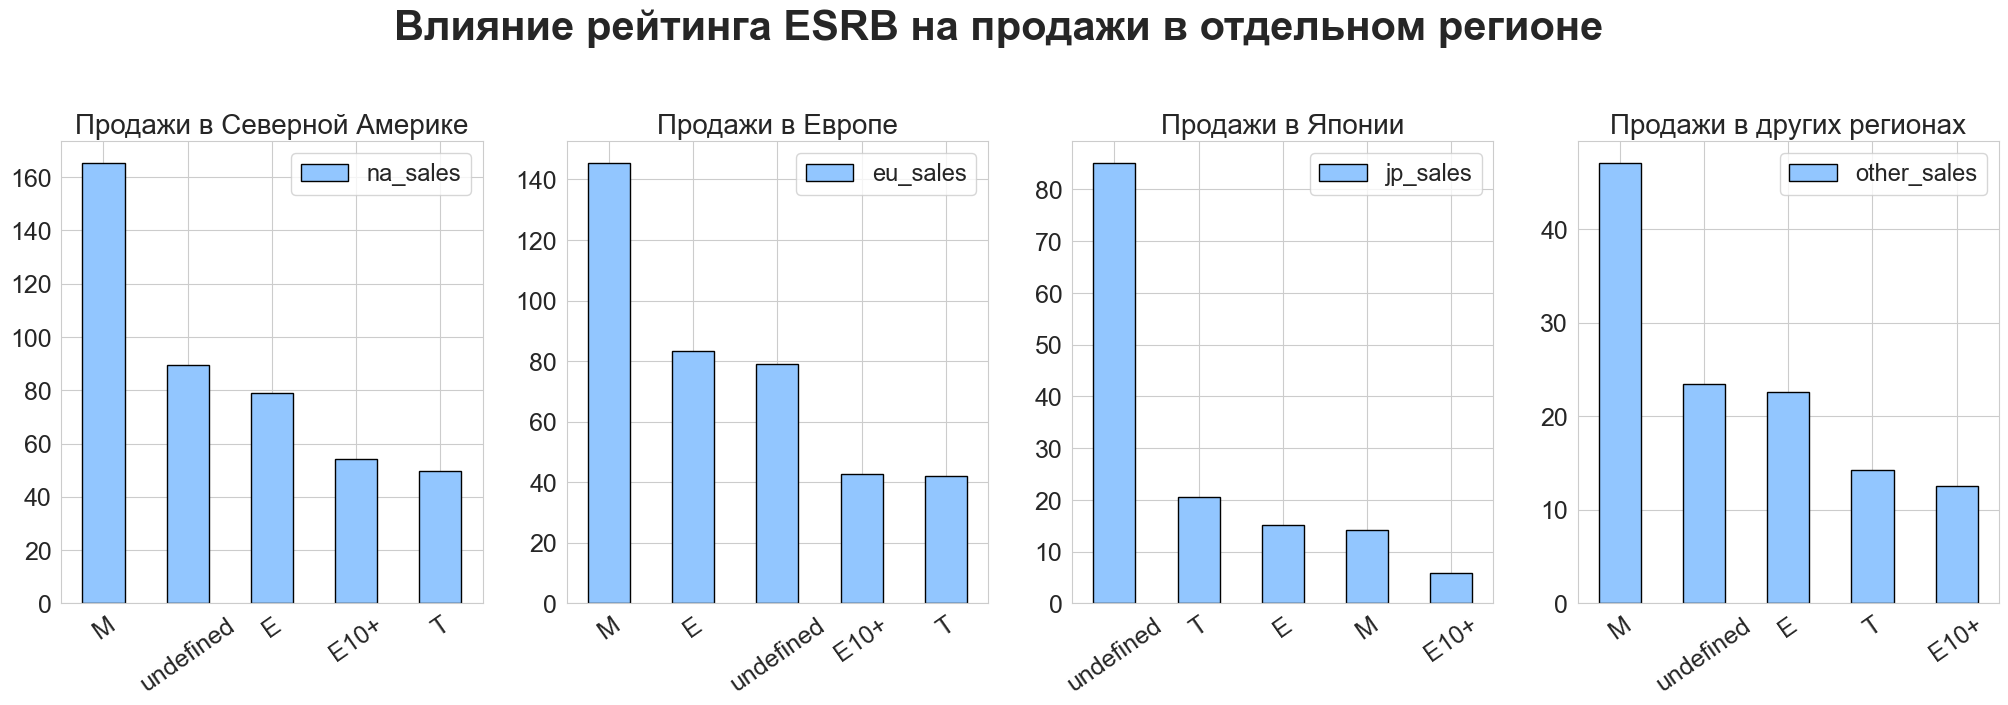

In [57]:
print ('Влияет ли рейтинг ESRB на продажи в отдельном регионе?')
fig, axes = plt.subplots(1, 4, figsize=(25,6))
fig.suptitle('Влияние рейтинга ESRB на продажи в отдельном регионе', y=1.1, fontweight='bold', fontsize=30)

portret_regions_plot('rating', 'na_sales', 0)
portret_regions_plot('rating', 'eu_sales', 1)
portret_regions_plot('rating', 'jp_sales', 2)
portret_regions_plot('rating', 'other_sales', 3)

**Вывод:** да, рейтинг определенно влияет на продажи в отдельных регионах. В ***Северной Америке, Европе и других регионах*** схожая картина - в первую очередь популярны игры с возрастным рейтингом ***17+***. ***Япония*** вновь отличилась, первое место там - ***undefined***, скорее всего это связано с тем, что ESRB - американская компания, и не все японские игры обращаются за оценкой рейтинга.

***


**Портрет пользователя из Северной Америки:**  
+ предпочитает платформу PS4  
+ чаще всего выбирает игры в жанре Action или Shooter  
+ играет в игры для людей старше 17 лет 

**Портрет пользователя из Европы:**  
+ предпочитает платформу PS4  
+ чаще всего выбирает игры в жанре Action или Shooter  
+ играет в игры для людей старше 17 лет  

**Портрет пользователя из Японии:**  
+ предпочитает платформу 3DS  
+ чаще всего выбирает игры в жанре Role-Playing  
+ играет в кастомные игры или игры от отечественных компаний   

**Портрет пользователей из других регионов:**  
+ предпочитает платформу PS4  
+ чаще всего выбирает игры в жанре Action или Shooter  
+ играет в игры для людей старше 17 лет  

### Проверка гипотез

Для проверки обеих гипотез будем использовать t-критерий Стьюдента, поскольку в обоих случаях выборки независимы между собой.

In [58]:
def check_hypothesis(ho, h1, alpha, sample_1, sample_2, equal_var=True):
    """
    Функция проверяет гипотезу о равенстве средних, используя t-критерий Стьюдента.
    
    Parameters
    ----------
    ho: string
        Нулевая гипотеза.
    h1: string
        Альтернативная гипотеза.
    alpha: float
        Уровень значимости.        
    sample_1: Pandas Dataframe
        Набор данных 1.
    sample_2: Pandas Dataframe
        Набор данных 2.
    equal_var: string
        True - значение по умолчанию. Параметр метода ttest_ind.
    
    Returns
    -------
    Функция возвращает None.
    """
    
    # выводим гипотезы, уровень значимости
    print(f'H0 (нулевая гипотеза): {ho}')
    print(f'H1 (альтернативная гипотеза): {h1}')
    print(f'Уровень значимости: {alpha}')
    print('')
    
    # выводим среднее с дисперсию по сэмплам
    print('Sample_1')
    print(f'Среднее значение: {sample_1.mean():.2f}, дисперсия: {sample_1.var():.2f}')
    print('')
    
    print('Sample_2')
    print(f'Среднее значение: {sample_2.mean():.2f}, дисперсия: {sample_2.var():.2f}')
    print('')
    
    # применяем t-критерий Стьюдента из стандартного пакета
    results = st.ttest_ind(sample_1, sample_2, equal_var=equal_var)
    print(f'p-значение: {results.pvalue:.5f}')
    print('')
    
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [59]:
#избавимся от пропущенных значений
xone = actual_df[actual_df['platform']=="xone"]['user_score'].dropna() 
pc = actual_df[actual_df['platform']=="pc"]['user_score'].dropna()

In [60]:
check_hypothesis(ho='cредние пользовательские рейтинги Xbox One = cредние пользовательские рейтинги PC',
                 h1='cредние пользовательские рейтинги Xbox One != cредние пользовательские рейтинги PC',
                 alpha=0.05,
                 sample_1=xone,
                 sample_2=pc,
                 equal_var=True
                )

H0 (нулевая гипотеза): cредние пользовательские рейтинги Xbox One = cредние пользовательские рейтинги PC
H1 (альтернативная гипотеза): cредние пользовательские рейтинги Xbox One != cредние пользовательские рейтинги PC
Уровень значимости: 0.05

Sample_1
Среднее значение: 6.52, дисперсия: 1.91

Sample_2
Среднее значение: 6.27, дисперсия: 3.04

p-значение: 0.14013

Не получилось отвергнуть нулевую гипотезу


**Вывод:** P-значение - это вероятность получить наблюдаемое статистическое различие между двумя группами случайно, при условии, что нулевая гипотеза верна. В данном случае результаты показывают, что p-значение равно 0.14013, что больше уровня значимости 0.05. Следовательно, мы не можем отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [61]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [62]:
#избавимся от пропущенных значений
action = actual_df[actual_df['genre']=="Action"]['user_score'].dropna()
sports = actual_df[actual_df['genre']=="Sports"]['user_score'].dropna()

In [63]:
check_hypothesis(ho='cредние пользовательские рейтинги жанра Action = cредние пользовательские рейтинги жанра Sports',
                 h1='cредние пользовательские рейтинги жанра Action != cредние пользовательские рейтинги жанра Sports',
                 alpha=0.05,
                 sample_1=action,
                 sample_2=sports,
                 equal_var=True
                )

H0 (нулевая гипотеза): cредние пользовательские рейтинги жанра Action = cредние пользовательские рейтинги жанра Sports
H1 (альтернативная гипотеза): cредние пользовательские рейтинги жанра Action != cредние пользовательские рейтинги жанра Sports
Уровень значимости: 0.05

Sample_1
Среднее значение: 6.84, дисперсия: 1.77

Sample_2
Среднее значение: 5.24, дисперсия: 3.18

p-значение: 0.00000

Отвергаем нулевую гипотезу


**Вывод:** отвергаем нулевую гипотезу о том, что cредние пользовательские рейтинги жанра Action одинаковы со cредними пользовательскими рейтингами жанра Sports. Не отвергаем альтернативную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports различны.

### Общий вывод

**Загрузили и изучили** датафрейм, содержащий в себе исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.  

***

В ходе **предобработки** было обнаружено, что в исходных данных много пропусков в  столбцах, содержащих информацию об оценках критиков, оценках пользователей и рейтинге игры. Информация, содержащаяся в них является важной для исследования и способной влиять на его результаты. Возможно, пропуски возникли по одной из причин: новизна игры, её непопулярность, или технический сбой. Необходимо сообщить об этом сотрудникам, осуществляющим сбор и выгрузку данных. 
Большинство пропусков оставили незаполненными, чтобы не искажать статистику. Посчитали общее количество продаж по всем регионам и записали результат в столбец `total_sales`.  

***

**В ходе исследовательского анализа данных было выявлено:** 
+ начиная с ***1994*** отмечается тенденция к ***увеличению*** количества выпускаемых игр с резким скачком в ***2002***. ***Пик*** приходится на ***2008 - 2009*** годы.  
+ характерный срок жизни платформы около **10-и лет**, исходя из этого решили считать актуальными данные за 2013 - 2016 годы  
+ потенциально прибыльные платформы: ***PS4, XOne, PC*** 
+ медианные значения продаж у всех платформ находятся примерно на одном уровне (около 0,2 миллионов). Это указывает на то, что большинство игр имеют относительно небольшие продажи. Однако заметно и наличие бестселлеров на каждой платформе, их продажи значительно превышают обычные значения  
+ отзывы критиков влияют на продажи: ***чем выше оценки критиков, тем выше продажи***  
+ ***Прибыльные жанры:*** Action, Shooter, Sports, Role-Playing, Platform  

***

**Составили портреты пользователей каждого региона:**

***Портрет пользователя из Северной Америки:***  
+ предпочитает платформу PS4  
+ чаще всего выбирает игры в жанре Action или Shooter  
+ играет в игры для людей старше 17 лет 

***Портрет пользователя из Европы:***  
+ предпочитает платформу PS4  
+ чаще всего выбирает игры в жанре Action или Shooter  
+ играет в игры для людей старше 17 лет  

***Портрет пользователя из Японии:***  
+ предпочитает платформу 3DS  
+ чаще всего выбирает игры в жанре Role-Playing  
+ играет в кастомные игры или игры от отечественных компаний  

**Портрет пользователей из других регионов:**  
+ предпочитает платформу PS4  
+ чаще всего выбирает игры в жанре Action или Shooter  
+ играет в игры для людей старше 17 лет  

***

**Проверили гипотезы:**  
+ Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - ***не отвергаем гипотезу*** 
+ Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - ***не отвергаем гипотезу***